# Introduction to Natural Language Processing with Spacy
Gratefully stolen from [Cytora](https://github.com/cytora/pycon-nlp-in-10-lines/blob/master/01_pride_and_predjudice.ipynb)
See also: [NLTK](http://www.nltk.org/book/), [Gensim](https://radimrehurek.com/gensim/), [GATE](https://gate.ac.uk/) & [Stanford Core NLP](https://stanfordnlp.github.io/CoreNLP/other-languages.html).
![NLTK](https://avatars3.githubusercontent.com/u/124114?s=400&v=4)

In [1]:
# This might be the tricky bit.
import requests
import spacy

nlp = spacy.load('en')

In [2]:
pride_and_prejudice = requests.get('http://www.gutenberg.org/files/1342/1342-0.txt').text

In [3]:
print(pride_and_prejudice[700:1061])


Chapter 1


It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered the rightful property
of


In [4]:
processed_text = nlp(pride_and_prejudice)

In [5]:
# How many sentences are in the book (Pride & Prejudice)?
sentences = [s for s in processed_text.sents]
print(len(sentences))

# Print sentences from index 10 to index 15, to make sure that we have parsed the correct book
print(sentences[10:15])

7593
[My dear Mr. Bennet,” said his lady to him one day, “have you heard that
Netherfield Park is let at last?”

, Mr. Bennet replied that he had not.

“, But it is,” returned she; “for Mrs. Long, has just been here, and she
told me all about it., ”

Mr. Bennet made no answer.

]


In [6]:
# Extract all the personal names from Pride & Prejudice and count their occurrences. 
# Expected output is a list in the following form: [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266) ...].

from collections import Counter, defaultdict

def find_character_occurences(doc):
    """
    Return a list of actors from `doc` with corresponding occurences.
    
    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266)]
    """
    
    characters = Counter()
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            characters[ent.lemma_] += 1
            
    return characters.most_common()

print(find_character_occurences(processed_text)[:20])

[('elizabeth', 623), ('darcy', 315), ('jane', 285), ('bennet', 265), ('bingley', 211), ('wickham', 183), ('collins', 178), ('lydia', 163), ('lizzy', 94), ('gardiner', 92), ('kitty', 71), ('lady catherine', 70), ('mary', 36), ('william', 33), ('hurst', 32), ('phillips', 30), ('forster', 27), ('longbourn', 26), ('lucas', 21), ('miss bingley', 20)]


In [7]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# Plot characters' mentions as a time series relative to the position of the actor's occurrence in a book.

def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list. 
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.
    
    :param doc: Spacy NLP parsed document
    :return: dict object in form
        {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    """
    
    character_offsets = defaultdict(list)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            character_offsets[ent.lemma_].append(ent.start)
            
    return dict(character_offsets)

character_occurences = get_character_offsets(processed_text)

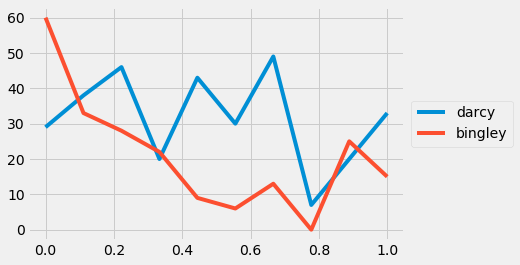

In [9]:
from matplotlib.pyplot import hist
from cycler import cycler

NUM_BINS = 10

def normalize(occurencies, normalization_constant):
    return [o / float(len(processed_text)) for o in occurencies]

def plot_character_timeseries(character_offsets, character_labels, normalization_constant=None):
    """
    Plot characters' personal names specified in `character_labels` list as time series.
    
    :param character_offsets: dict object in form {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    :param character_labels: list of strings that should match some of the keys in `character_offsets`
    :param normalization_constant: int
    """
    x = [character_offsets[character_label] for character_label in character_labels] 
        
    with plt.style.context('fivethirtyeight'):
        plt.figure()
        n, bins, patches = plt.hist(x, NUM_BINS, label=character_labels)
        plt.clf()
        
        ax = plt.subplot(111)
        for i, a in enumerate(n):
            ax.plot([float(x) / (NUM_BINS - 1) for x in range(len(a))], a, label=character_labels[i])
            
        matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['r','k','c','b','y','m','g','#54a1FF'])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plot_character_timeseries(character_occurences, ['darcy', 'bingley'], normalization_constant=len(processed_text))
plot_character_timeseries(character_occurences, ['darcy', 'bingley'])

In [10]:
# Find words (adjectives) that describe Mr. Darcy.

def get_character_adjectives(doc, character_lemma):
    """
    Find all the adjectives related to `character_lemma` in `doc`
    
    :param doc: Spacy NLP parsed document
    :param character_lemma: string object
    :return: list of adjectives related to `character_lemma`
    """
    
    adjectives = []
    for ent in doc.ents:
        if ent.lemma_ == character_lemma:
            for token in ent.subtree:
                if token.pos_ == 'ADJ': # Replace with if token.dep_ == 'amod':
                    adjectives.append(token.lemma_)
    
    for ent in doc.ents:
        if ent.lemma_ == character_lemma:
            if ent.root.dep_ == 'nsubj':
                for child in ent.root.head.children:
                    if child.dep_ == 'acomp':
                        adjectives.append(child.lemma_)
    
    return adjectives

print(get_character_adjectives(processed_text, 'darcy'))

['grave', 'her', 'delightful', 'his', 'particular', 'disappointing', 'late', 'late', 'late', 'late', 'intimate', 'confidential', 'present', 'her', 'much', 'his', 'her', 'late', 'late', 'present', 'abominable', 'all', 'last', 'late', 'poor', 'handsome', 'her', 'last', 'her', 'her', 'little', 'his', 'disagreeable', 'clever', 'worth', 'little', 'grow', 'studious', 'sorry', 'unworthy', 'answerable', 'impatient', 'ashamed', 'kind', 'proud', 'tall', 'punctual', 'engaged', 'fond']


In [11]:
# Find characters that are 'talking', 'saying', 'doing' the most. Find the relationship between 
# entities and corresponding root verbs.

character_verb_counter = Counter()
VERB_LEMMA = 'say'

for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ == VERB_LEMMA:
        character_verb_counter[ent.text] += 1

print(character_verb_counter.most_common(10)) 
        
# Find all the characters that got married in the book.
#
# Here is an example sentence from which this information could be extracted:
# 
# "her mother was talking to that one person (Lady Lucas) freely,
# openly, and of nothing else but her expectation that Jane would soon
# be married to Mr. Bingley."
#

[('Elizabeth', 41), ('Bennet', 30), ('Jane', 15), ('Bingley', 9), ('Miss Bingley', 7), ('Lizzy', 6), ('Gardiner', 5), ('Darcy', 5), ('Lydia', 5), ('Wickham', 4)]
